In [28]:
import meep as mp
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Video
%matplotlib inline

In [29]:
resolution = 50

a = 1.0
d = 0.5
t = 0.05
dpml = 2.0
pad = 2.0
sz = 2*(t/2+pad+dpml)
cell_size = mp.Vector3(a, 0, sz)
pml_layers = [mp.PML(thickness=dpml, direction=mp.Z)]

wvl_min = 0.5
wvl_max = 1.5
fmin = 1/wvl_max
fmax = 1/wvl_min
fcen = 0.5*(fmin+fmax)
df = (fmax-fmin)/2
nfreq = 100

In [33]:
theta = 80

theta_r = np.radians(theta)
# k = mp.Vector3(z=fmin).rotate(mp.Vector3(z=1), theta_r)
k = mp.Vector3(x=1).rotate(mp.Vector3(z=1), theta_r)

# sources = [mp.Source(mp.GaussianSource(fcen, fwidth=df), component=mp.Ex, center=mp.Vector3(z=sz/2-dpml-0.1), size=mp.Vector3(a))]
sources = [
    mp.EigenModeSource(mp.ContinuousSource(frequency=fcen),
                    component=mp.Ex,
                    center=mp.Vector3(z=sz/2-dpml-0.1),
                    size=mp.Vector3(a),
                    eig_kpoint=k,
    ),
]

from meep.materials import Ag
geometry = [
    mp.Block(center=mp.Vector3(z=-sz/4), size=mp.Vector3(mp.inf, 0, sz/2), material=mp.Medium(index=1.41)),
    mp.Block(center=mp.Vector3(), size=mp.Vector3(d,0,t), material=Ag),
]

sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    sources=sources,
    geometry=geometry,
    # k_point=mp.Vector3(),
    k_point=k,
    # dimensions=3,
    resolution=resolution,
)

refl = sim.add_mode_monitor(fcen, df, nfreq, mp.FluxRegion(center=mp.Vector3(z=-sz/2+dpml+0.1), size=mp.Vector3(a)))
tran = sim.add_mode_monitor(fcen, df, nfreq, mp.FluxRegion(center=mp.Vector3(z=sz/2-dpml-0.2), size=mp.Vector3(a)))

/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/meep/source.py:504: RuntimeWarning: EigenModeSource component is not ALL_COMPONENTS (the default), which makes it non-unidirectional.
  warnings.warn("EigenModeSource component is not ALL_COMPONENTS (the default), which makes it non-unidirectional.",RuntimeWarning)


-----------
Initializing structure...
time for choose_chunkdivision = 0.000164032 s
Working in 3D dimensions.
Computational cell is 1 x 0.02 x 8.06 with resolution 50
     block, center = (0,0,-2.0125)
          size (1e+20,0,4.025)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.9881,1.9881,1.9881)
     block, center = (0,0,0)
          size (0.5,0,0.05)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.217481 s
lorentzian susceptibility: frequency=16.365, gamma=1.95106
lorentzian susceptibility: frequency=7.32593, gamma=0.738804
lorentzian susceptibility: frequency=6.60165, gamma=0.052426
lorentzian susceptibility: frequency=3.61417, gamma=0.364563
lorentzian susceptibility: frequency=0.658148, gamma=3.13427
drude susceptibility: frequency=1e-10, gamma=0.0387146
-----------
Meep: using complex fields.
MPB solved for frequency_1(0.173648,0.984808,1.33333) = 1.66667 aft

     block, center = (0,0,-2.0125)
          size (1e+20,0,4.025)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.9881,1.9881,1.9881)
     block, center = (0,0,0)
          size (0.5,0,0.05)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
Meep progress: 1.54/5.0 = 30.8% done in 4.0s, 9.0s to go
on time step 154 (time=1.54), 0.025984 s/step
Meep progress: 3.6/5.0 = 72.0% done in 8.0s, 3.1s to go
on time step 360 (time=3.6), 0.0196258 s/step
run 0 finished at t = 5.0 (500 timesteps)


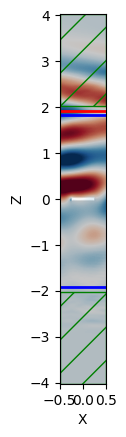

In [34]:
animate = mp.Animate2D(sim, fields=mp.Ex)
sim.run(mp.at_every(0.4/10,animate),until=5)

In [35]:
filename = "square-cavity1.mp4"
fps = 10
animate.to_mp4(fps,filename)
Video(filename)

Generating MP4...


In [23]:
data1 = sim.get_eigenmode_coefficients(refl, [1])
data2 = sim.get_eigenmode_coefficients(tran, [1])

MPB solved for frequency_1(0,0,1) = 1 after 10 iters
Dominant planewave for band 1: (0.000000,0.000000,1.000000)
MPB solved for frequency_1(0,0,1.00673) = 1.00673 after 10 iters
Dominant planewave for band 1: (0.000000,0.000000,1.006734)
MPB solved for frequency_1(0,0,1.01347) = 1.01347 after 10 iters
Dominant planewave for band 1: (0.000000,0.000000,1.013468)
MPB solved for frequency_1(0,0,1.0202) = 1.0202 after 10 iters
Dominant planewave for band 1: (0.000000,0.000000,1.020202)
MPB solved for frequency_1(0,0,1.02694) = 1.02694 after 10 iters
Dominant planewave for band 1: (0.000000,0.000000,1.026936)
MPB solved for frequency_1(0,0,1.03367) = 1.03367 after 10 iters
Dominant planewave for band 1: (0.000000,0.000000,1.033670)
MPB solved for frequency_1(0,0,1.0404) = 1.0404 after 10 iters
Dominant planewave for band 1: (0.000000,0.000000,1.040404)
MPB solved for frequency_1(0,0,1.04714) = 1.04714 after 10 iters
Dominant planewave for band 1: (0.000000,0.000000,1.047138)
MPB solved for f

In [24]:
data2.kpoints

[Vector3<0.0, 0.0, 0.999999999999998>,
 Vector3<0.0, 0.0, 1.0067340067340047>,
 Vector3<0.0, 0.0, 1.0134680134680112>,
 Vector3<0.0, 0.0, 1.020202020202018>,
 Vector3<0.0, 0.0, 1.0269360269360241>,
 Vector3<0.0, 0.0, 1.0336700336700306>,
 Vector3<0.0, 0.0, 1.0404040404040371>,
 Vector3<0.0, 0.0, 1.0471380471380434>,
 Vector3<0.0, 0.0, 1.0538720538720503>,
 Vector3<0.0, 0.0, 1.0606060606060563>,
 Vector3<0.0, 0.0, 1.067340067340063>,
 Vector3<0.0, 0.0, 1.074074074074069>,
 Vector3<0.0, 0.0, 1.0808080808080753>,
 Vector3<0.0, 0.0, 1.0875420875420818>,
 Vector3<0.0, 0.0, 1.0942760942760879>,
 Vector3<0.0, 0.0, 1.1010101010100946>,
 Vector3<0.0, 0.0, 1.107744107744101>,
 Vector3<0.0, 0.0, 1.1144781144781073>,
 Vector3<0.0, 0.0, 1.121212121212113>,
 Vector3<0.0, 0.0, 1.1279461279461191>,
 Vector3<0.0, 0.0, 1.1346801346801256>,
 Vector3<0.0, 0.0, 1.1414141414141317>,
 Vector3<0.0, 0.0, 1.1481481481481377>,
 Vector3<0.0, 0.0, 1.1548821548821442>,
 Vector3<0.0, 0.0, 1.16161616161615>,
 Vector3

In [25]:
%%capture

p1_coeff = sim.get_eigenmode_coefficients(refl, [1]).alpha[0]
p2_coeff = sim.get_eigenmode_coefficients(tran, [1]).alpha[0]

c1 = np.array([coef[1] for coef in p1_coeff])
c2 = np.array([coef[0] for coef in p2_coeff])
c3 = np.array([coef[0] for coef in p1_coeff])

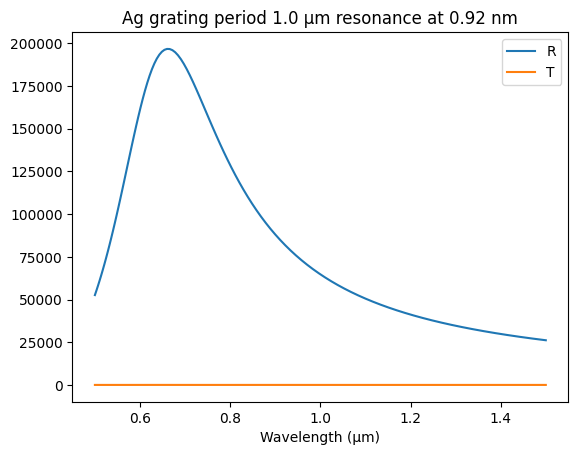

In [26]:
freqs = np.linspace(fcen-df, fcen+df, nfreq)
wl = 1/freqs
R = np.abs(c1)**2 / np.abs(c3)**2
T = np.abs(c2)**2 / np.abs(c3)**2

res_freq = 0.5*(wl[np.argmax(T)]+wl[np.argmin(T)])

plt.plot(wl, R, label='R')
plt.plot(wl, T, label='T')
plt.title('Ag grating period %.1f µm resonance at %.2f nm' % (a, res_freq))
plt.xlabel('Wavelength (µm)')
plt.legend()
title = 'square_grating_%.2fum' % res_freq
# plt.savefig('results/'+title+'.png')

     block, center = (0,0,-2.0125)
          size (1e+20,0,4.025)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.9881,1.9881,1.9881)
     block, center = (0,0,0)
          size (0.5,0,0.05)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


<AxesSubplot:xlabel='X', ylabel='Z'>

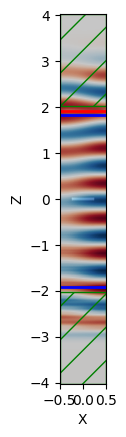

In [27]:
sim.plot2D(fields=mp.Ex)